In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Dados de vendas
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

# Transformação dos dados e criação de feature (mês em forma numérica)
df_vendas = pd.DataFrame(dados_vendas)
df_vendas['mes_num'] = df_vendas.index + 1 # também poderia ser range(1, 13)

# Modelo
X = df_vendas[['mes_num']]
y = df_vendas['vendas']
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
# Treinamento do modelo com algoritmo de regressão linear
model = LinearRegression().fit(X_train, y_train)
# Previsão com dados de teste
y_pred = model.predict(X_test)
# Avaliação do modelo: R2, MAE, RMSE
r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred), root_mean_squared_error(y_test, y_pred)


(0.9977168282207718,
 np.float64(14.60823373173965),
 np.float64(17.00593304415377))

In [11]:
# Coeficientes do modelo
model.coef_, model.intercept_

(array([113.14741036]), np.float64(1984.860557768924))

<Axes: xlabel='vendas', ylabel='Count'>

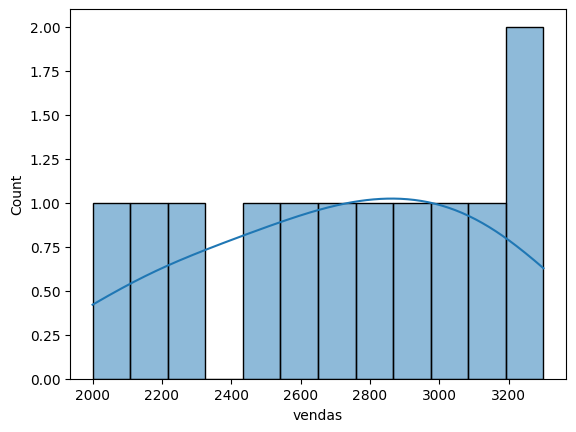

In [23]:
# Histograma de vendas
sns.histplot(df_vendas['vendas'], bins=12, kde=True)

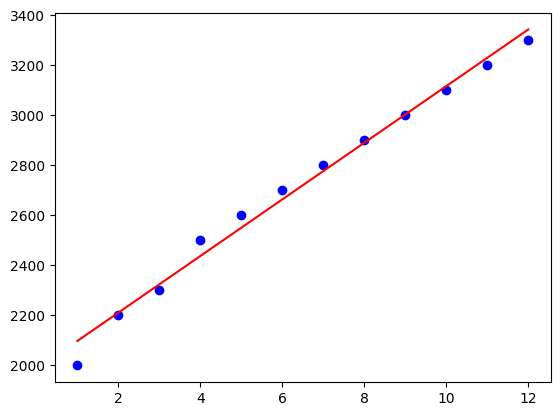

In [27]:
# Scatter plot com distribuição de vendas
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')